In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.models import load_model
import cv2

c:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
loaded_model = load_model("../models/output/model.h5", compile=False)

In [3]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_images (InputLayer)      [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 300, 300, 64  1792        ['input_images[0][0]']           
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 300, 300, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

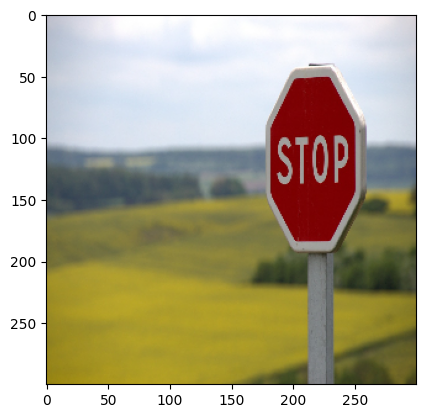

In [4]:
img_org = cv2.imread("../data/tests/stop-634941_1280.jpg")
img_org = cv2.resize(img_org, (300, 300))
# img = img / 255.0
plt.imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
img = img_org.reshape(1, 300, 300, 3)
img = np.array(img, dtype="float32") / 255.0

In [6]:
prediction = loaded_model.predict(img)
bbox = prediction[0][0] * 300.0
label = np.argmax(prediction[1], axis=1)

1/1 [==============================] - 3s 3s/step


In [7]:
xmin, ymin, xmax, ymax = np.array(bbox, dtype=int)

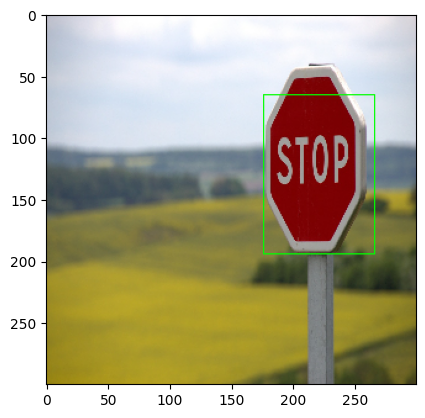

In [8]:
image = cv2.rectangle(img_org, (xmin, ymin), (xmax, ymax), (0, 255, 0))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()